# Read Sensor and Actuators Data

- Author: Benazir de la Rosa
- Contact: benazir.delarosa@gmail.com

In [1]:
import os
import pandas as pd
import json
import yaml
import mpld3
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
import json
import numpy as np
import datetime
import seaborn


def get_data(path):
    list_viz = os.listdir(path)
    dfs = []
    for item in list_viz:
        dfs.append(pd.read_csv(path + item, sep='\t'))
    df_final = pd.concat(dfs)
    df_final = df_final.drop(columns=['Unnamed: 0'])
    df_final['date'] = pd.to_datetime(df_final['date'])
    return df_final

def clean_door_state_hist(string):
    if string=='closed':
        string = 0
    elif string == 'open':
        string = 1
    return string


with open('config.yml', 'r') as file:
    config = yaml.safe_load(file)


### Fridge Data Monitoring

In [2]:
fridge_1 = get_data(config['tcs_hackaton']['paths']['Fridge_1_collection'])
fridge_2 = get_data(config['tcs_hackaton']['paths']['Fridge_2_collection'])
fridge_3 = get_data(config['tcs_hackaton']['paths']['Fridge_3_collection'])

In [3]:
fridge_1['date'] = pd.to_datetime(fridge_1['date'])
fridge_2['date'] = pd.to_datetime(fridge_2['date'])
fridge_3['date'] = pd.to_datetime(fridge_3['date'])
df_f1_last = fridge_1.sort_values(by='date', ascending=False).reset_index()['encyclopedia/fridge_1'][0]
df_f2_last = fridge_2.sort_values(by='date', ascending=False).reset_index()['encyclopedia/fridge_2'][0]
df_f3_last = fridge_3.sort_values(by='date', ascending=False).reset_index()['encyclopedia/fridge_3'][0]

last_checked_signals = {'Fridge 1 Temperature':df_f1_last, 'Fridge 2 Temperature': df_f2_last, 'Fridge 3 Temperature': df_f3_last}

Text(0.5, 0.98, 'Real Time Fridges Monitoring')

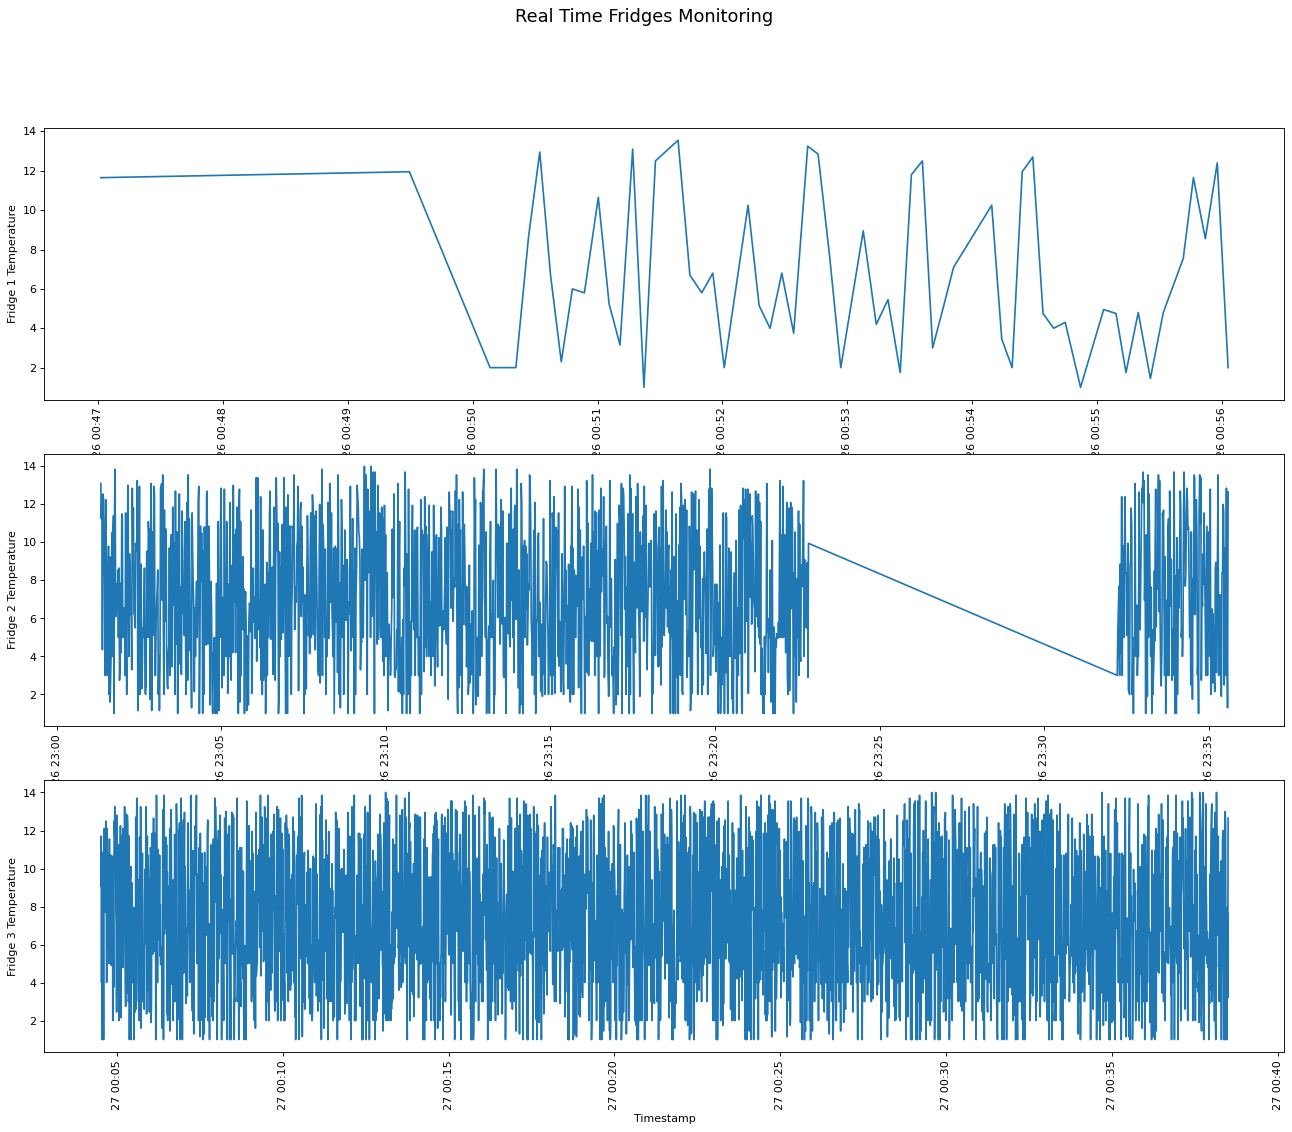

In [4]:
# Create 2x2 sub plots
gs = gridspec.GridSpec(3, 1)

fig_fridges_behavior = pl.figure(num=None, figsize=(20, 15), dpi=80, facecolor='w', edgecolor='k')
ax = pl.subplot(gs[0, 0]) # row 0, col 0
pl.plot(fridge_1['date'], fridge_1['encyclopedia/temperature'])
pl.xticks(rotation=90)
pl.xlabel('Timestamp')
pl.ylabel('Fridge 1 Temperature')

ax = pl.subplot(gs[1, 0]) # row 0, col 1
pl.plot(fridge_2['date'], fridge_2['encyclopedia/fridge_2'])
pl.xticks(rotation=90)
pl.xlabel('Timestamp')
pl.ylabel('Fridge 2 Temperature')

ax = pl.subplot(gs[2, 0]) # row 1, span all columns
pl.plot(fridge_3['date'], fridge_3['encyclopedia/fridge_3'])
pl.xticks(rotation=90)
pl.xlabel('Timestamp')
pl.ylabel('Fridge 3 Temperature')

fig_fridges_behavior.suptitle('Real Time Fridges Monitoring', fontsize=16)

In [5]:
html_str = mpld3.fig_to_html(fig_fridges_behavior)
Html_file= open("app_web_fridges.html","w")
Html_file.write(html_str)
Html_file.close()

### Garage Door

In [6]:
garage_door_1 = get_data(config['tcs_hackaton']['paths']['Garage_door_1_collection'])
garage_door_2 = get_data(config['tcs_hackaton']['paths']['Garage_door_2_collection'])
garage_door_3 = get_data(config['tcs_hackaton']['paths']['Garage_door_3_collection'])
garage_door_1['date'] = pd.to_datetime(garage_door_1['date'])
garage_door_2['date'] = pd.to_datetime(garage_door_2['date'])
garage_door_3['date'] = pd.to_datetime(garage_door_3['date'])
df_gd1_last = garage_door_1.sort_values(by='date', ascending=False).reset_index()['encyclopedia/garage_door_1'][0]
df_gd2_last = garage_door_2.sort_values(by='date', ascending=False).reset_index()['encyclopedia/garage_door_2'][0]
df_gd3_last = garage_door_3.sort_values(by='date', ascending=False).reset_index()['encyclopedia/garage_door_3'][0]
last_checked_signals['Garage Door 1'] = df_gd1_last
last_checked_signals['Garage Door 2'] = df_gd2_last
last_checked_signals['Garage Door 3'] = df_gd3_last


In [7]:
garage_door_1['day'] = garage_door_1['date'].apply(lambda x:x.day)
garage_door_1['hour'] = garage_door_1['date'].apply(lambda x:x.hour)
garage_door_2['day'] = garage_door_2['date'].apply(lambda x:x.day)
garage_door_2['hour'] = garage_door_2['date'].apply(lambda x:x.hour)
garage_door_3['day'] = garage_door_3['date'].apply(lambda x:x.day)
garage_door_3['hour'] = garage_door_3['date'].apply(lambda x:x.hour)

In [8]:
garage_door_hist = pd.read_csv("C:\\Users\\g1238\\Documents\\tcs_hackaton\\data\\ML_app_data\\Train_Test_IoT_Garage_Door.csv")
garage_door_hist['day'] = garage_door_hist['date'].apply(lambda x:int(x.split('-')[0]))
garage_door_hist['hour'] = garage_door_hist['time'].apply(lambda x:int(x.split(':')[0]))
garage_door_hist['door_state'] = list(map(clean_door_state_hist,garage_door_hist['door_state']))


In [9]:
garage_door_hist_pvt = pd.pivot_table(garage_door_hist, values='door_state', index=['day'],
                    columns=['hour'], aggfunc=np.sum).fillna(0)

Text(0.5, 0.98, 'Real Time Garage Door Monitoring')

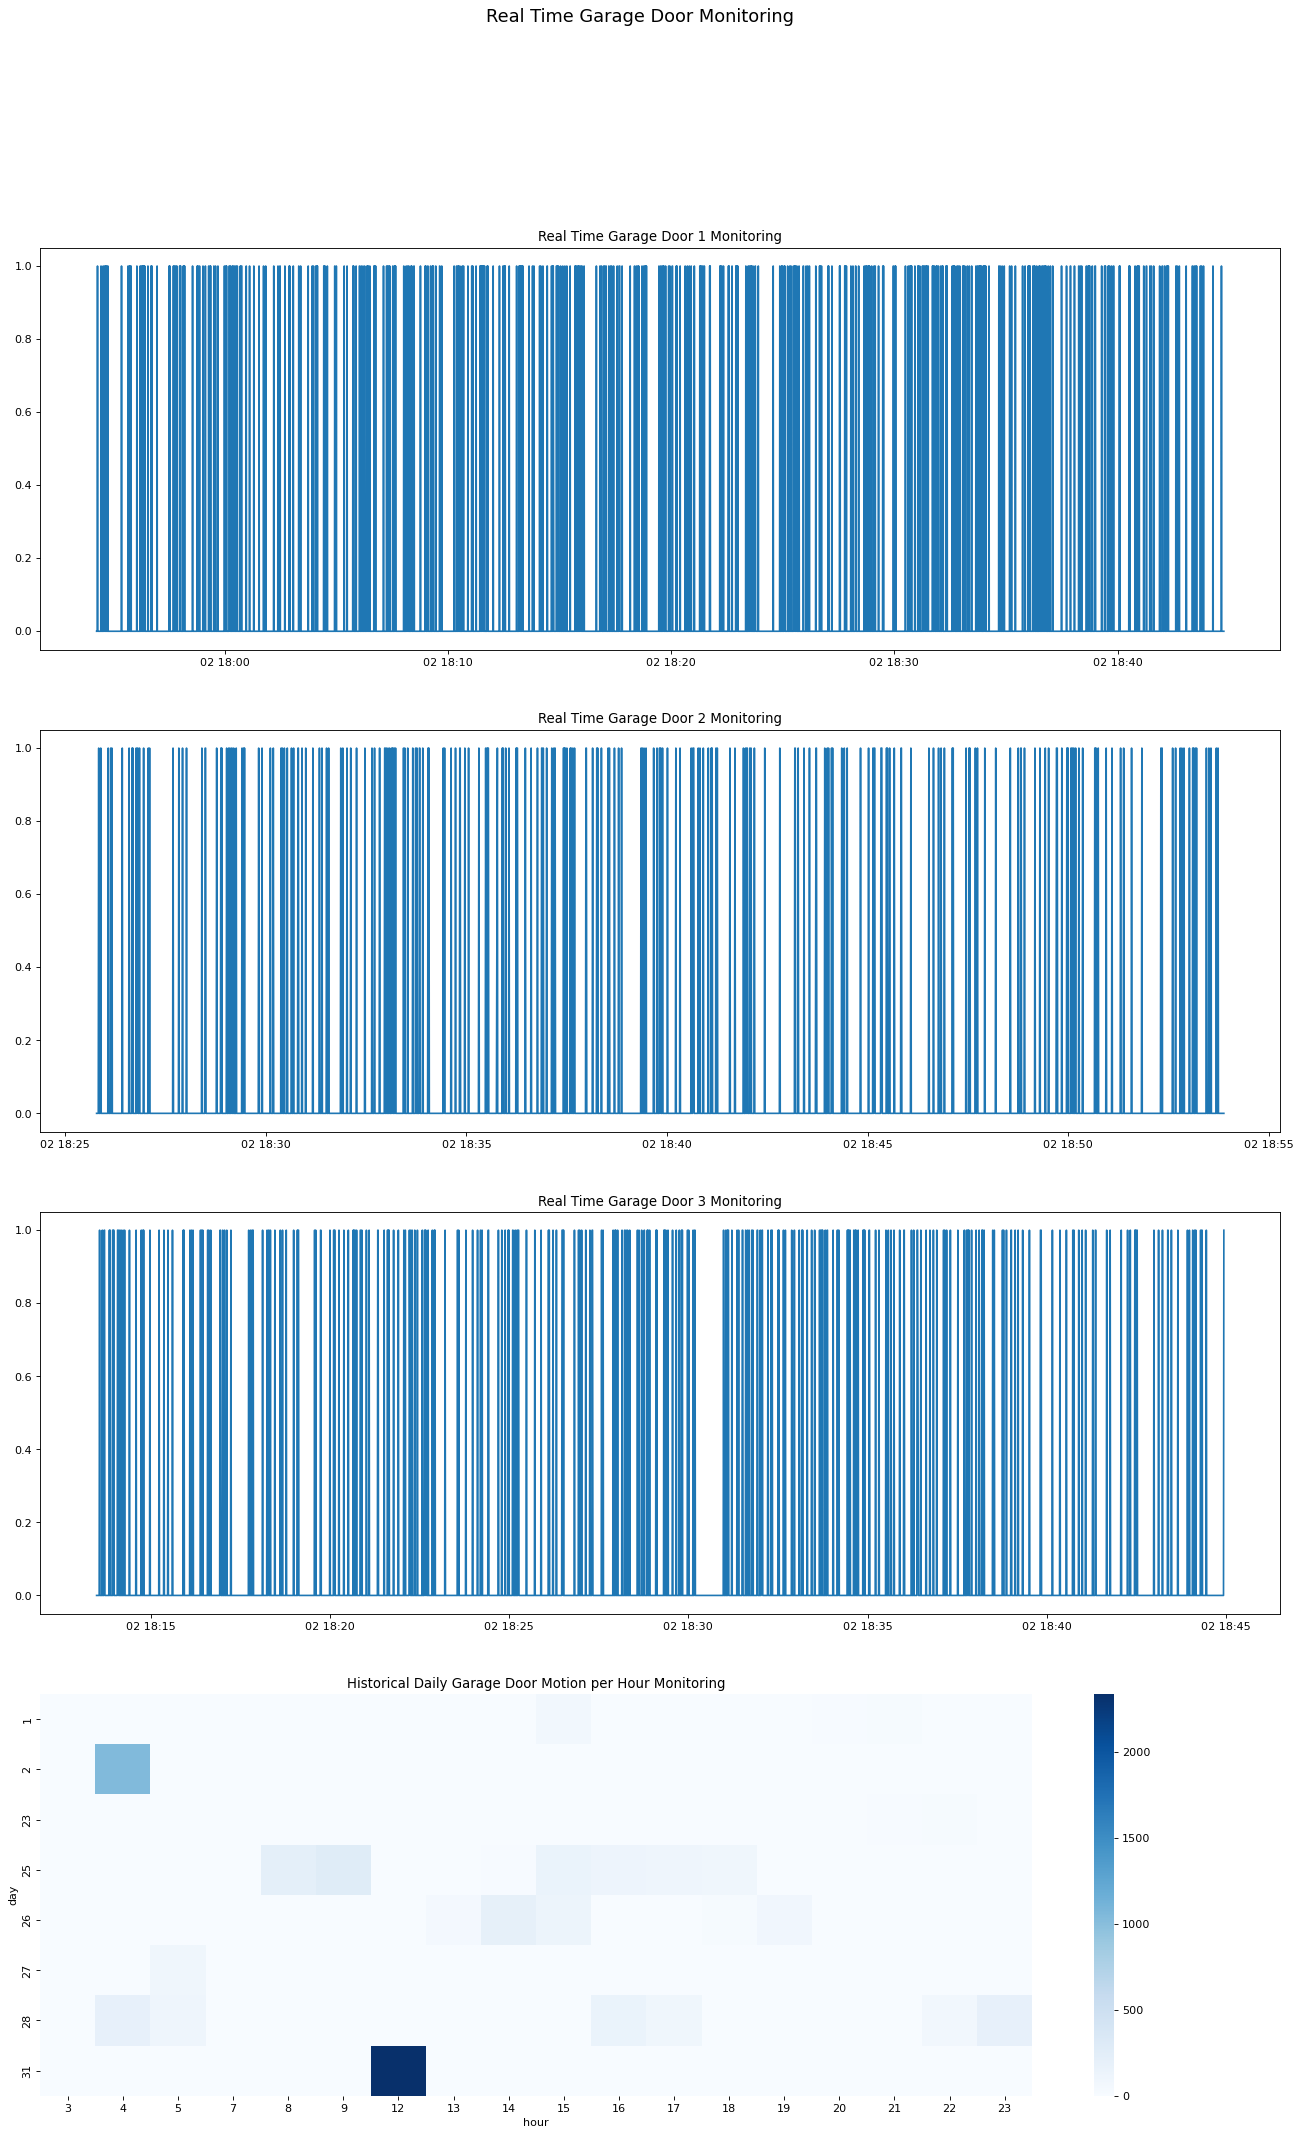

In [10]:
# Create 2x2 sub plots
gs = gridspec.GridSpec(4, 1)

fig_garage_door_behavior = pl.figure(num=None, figsize=(20, 30), dpi=80, facecolor='w', edgecolor='k')
ax = pl.subplot(gs[0, 0]) # row 0, col 0
pl.plot(garage_door_1['date'],garage_door_1['encyclopedia/garage_door_1'])
pl.title('Real Time Garage Door 1 Monitoring')

ax = pl.subplot(gs[1, 0]) # row 0, col 1
pl.plot(garage_door_2['date'],garage_door_2['encyclopedia/garage_door_2'])
pl.title('Real Time Garage Door 2 Monitoring')

ax = pl.subplot(gs[2, 0]) # row 1, span all columns
pl.plot(garage_door_3['date'],garage_door_3['encyclopedia/garage_door_3'])
pl.title('Real Time Garage Door 3 Monitoring')

ax = pl.subplot(gs[3,0])
ax.set_title('Historical Daily Garage Door Motion per Hour Monitoring')
seaborn.heatmap(garage_door_hist_pvt, ax=ax, cmap='Blues')


fig_garage_door_behavior.suptitle('Real Time Garage Door Monitoring', fontsize=16)

In [11]:
html_str = mpld3.fig_to_html(fig_garage_door_behavior)
Html_file= open("app_web_garage_doors.html","w")
Html_file.write(html_str)
Html_file.close()

### Weather Data

In [12]:
weather_1 = get_data(config['tcs_hackaton']['paths']['Iot_weather_1_collection']).dropna()
weather_2 = get_data(config['tcs_hackaton']['paths']['Iot_weather_2_collection']).dropna()
weather_3 = get_data(config['tcs_hackaton']['paths']['Iot_weather_3_collection']).dropna()
weather_1['date'] = pd.to_datetime(weather_1['date'])
weather_2['date'] = pd.to_datetime(weather_2['date'])
weather_3['date'] = pd.to_datetime(weather_3['date'])
df_weather_1_last = weather_1.sort_values(by='date', ascending=False).reset_index()['encyclopedia/iot_weather_1'][0]
df_weather_2_last = weather_2.sort_values(by='date', ascending=False).reset_index()['encyclopedia/iot_weather_2'][0]
df_weather_3_last = weather_3.sort_values(by='date', ascending=False).reset_index()['encyclopedia/iot_weather_3'][0]
last_checked_signals['Weather 1 Temperature'] = df_weather_1_last
last_checked_signals['Weather 2 Temperature'] = df_weather_2_last
last_checked_signals['Weather 3 Temperature'] = df_weather_3_last


Text(0.5, 0.98, 'Real Time Weather Temperature Monitoring')

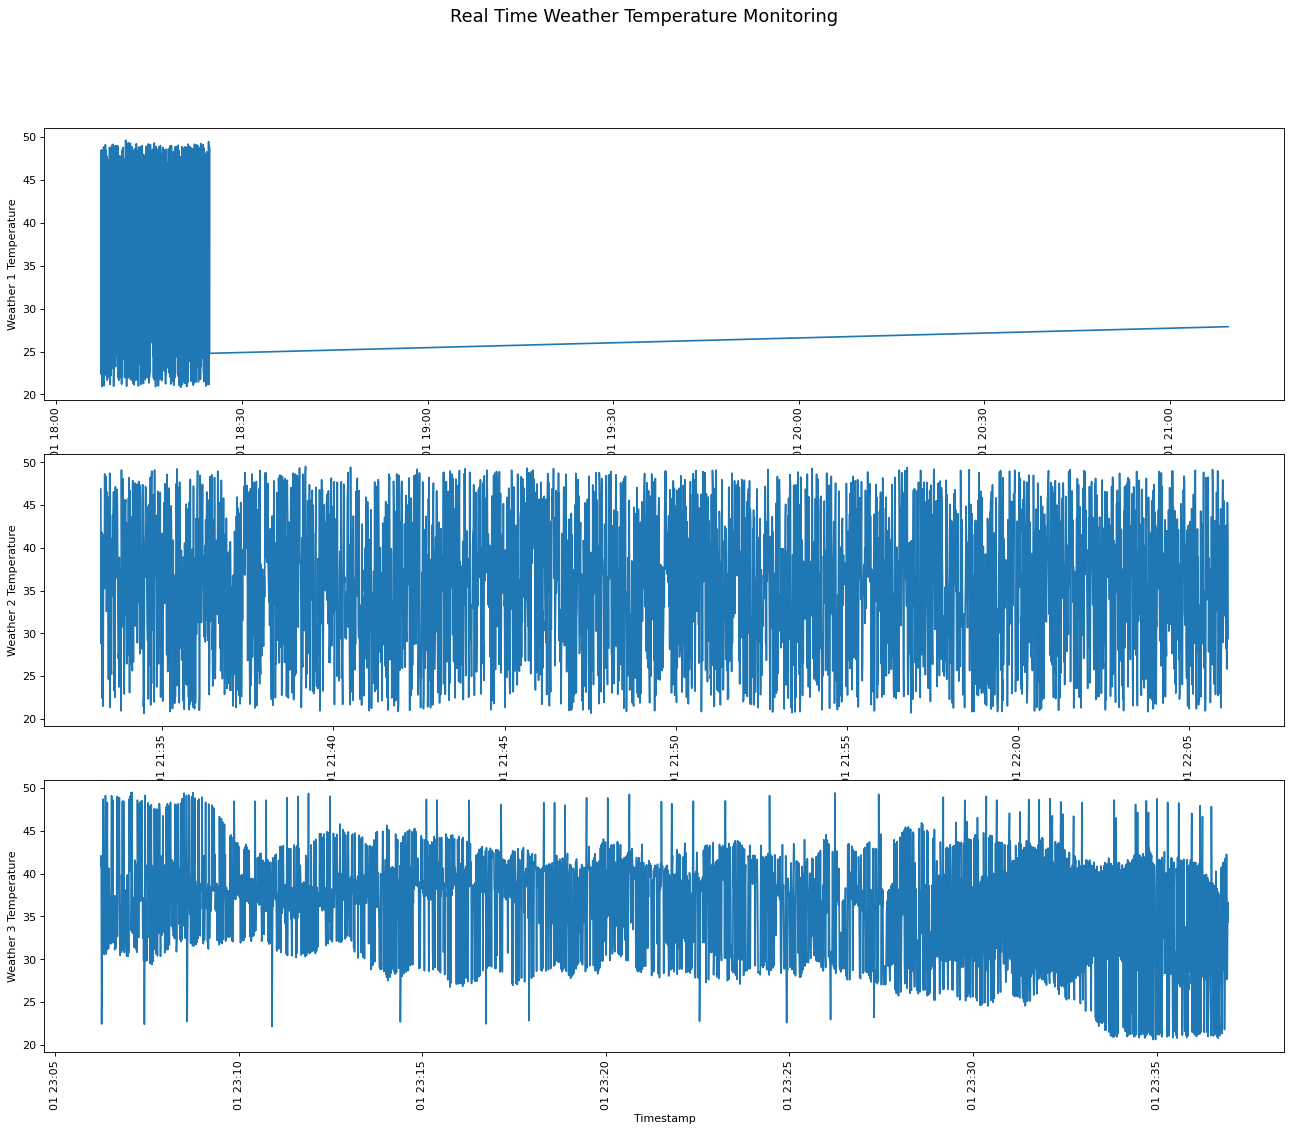

In [13]:
gs = gridspec.GridSpec(3, 1)

fig_weather_behavior = pl.figure(num=None, figsize=(20, 15), dpi=80, facecolor='w', edgecolor='k')
ax = pl.subplot(gs[0, 0]) # row 0, col 0
pl.plot(weather_1['date'], weather_1['encyclopedia/iot_weather_1'])
pl.xticks(rotation=90)
pl.xlabel('Timestamp')
pl.ylabel('Weather 1 Temperature')

ax = pl.subplot(gs[1, 0]) # row 0, col 1
pl.plot(weather_2['date'], weather_2['encyclopedia/iot_weather_2'])
pl.xticks(rotation=90)
pl.xlabel('Timestamp')
pl.ylabel('Weather 2 Temperature')

ax = pl.subplot(gs[2, 0]) # row 1, span all columns
pl.plot(weather_3['date'], weather_3['encyclopedia/iot_weather_3'])
pl.xticks(rotation=90)
pl.xlabel('Timestamp')
pl.ylabel('Weather 3 Temperature')

fig_weather_behavior.suptitle('Real Time Weather Temperature Monitoring', fontsize=16)

In [14]:
html_str = mpld3.fig_to_html(fig_weather_behavior)
Html_file= open("app_web_weather_monitoring.html","w")
Html_file.write(html_str)
Html_file.close()

### Motion Light

In [15]:
motion_light_1 = get_data(config['tcs_hackaton']['paths']['Motion_light_1_collection'])
motion_light_2 = get_data(config['tcs_hackaton']['paths']['Motion_light_2_collection'])
motion_light_3 = get_data(config['tcs_hackaton']['paths']['Motion_light_3_collection'])
motion_light_1['date'] = pd.to_datetime(motion_light_1['date'])
motion_light_2['date'] = pd.to_datetime(motion_light_2['date'])
motion_light_3['date'] = pd.to_datetime(motion_light_3['date'])
df_ml_1_last = motion_light_1.sort_values(by='date', ascending=False).reset_index()['encyclopedia/motion_light_1'][0]
df_ml_2_last = motion_light_2.sort_values(by='date', ascending=False).reset_index()['encyclopedia/motion_light_2'][0]
df_ml_3_last = motion_light_3.sort_values(by='date', ascending=False).reset_index()['encyclopedia/motion_light_3'][0]
last_checked_signals['Motion Light 1'] = df_ml_1_last
last_checked_signals['Motion Light 2'] = df_ml_2_last
last_checked_signals['Motion Light 3'] = df_ml_3_last

In [16]:
motion_light_df_hist = pd.read_csv("C:\\Users\\g1238\\Documents\\tcs_hackaton\\data\\ML_app_data\\Train_Test_IoT_Motion_Light.csv")


In [17]:
motion_light_df_hist['day'] = motion_light_df_hist['date'].apply(lambda x:int(x.split('-')[0]))
motion_light_df_hist['hour'] = motion_light_df_hist['time'].apply(lambda x:int(x.split(':')[0]))

In [19]:
motion_light_hist_pvt = pd.pivot_table(motion_light_df_hist, values='motion_status', index=['day'],
                    columns=['hour'], aggfunc=np.sum).fillna(0)

In [ ]:
motion_light_3

Text(0.5, 0.98, 'Real Time Motion Lights Monitoring')

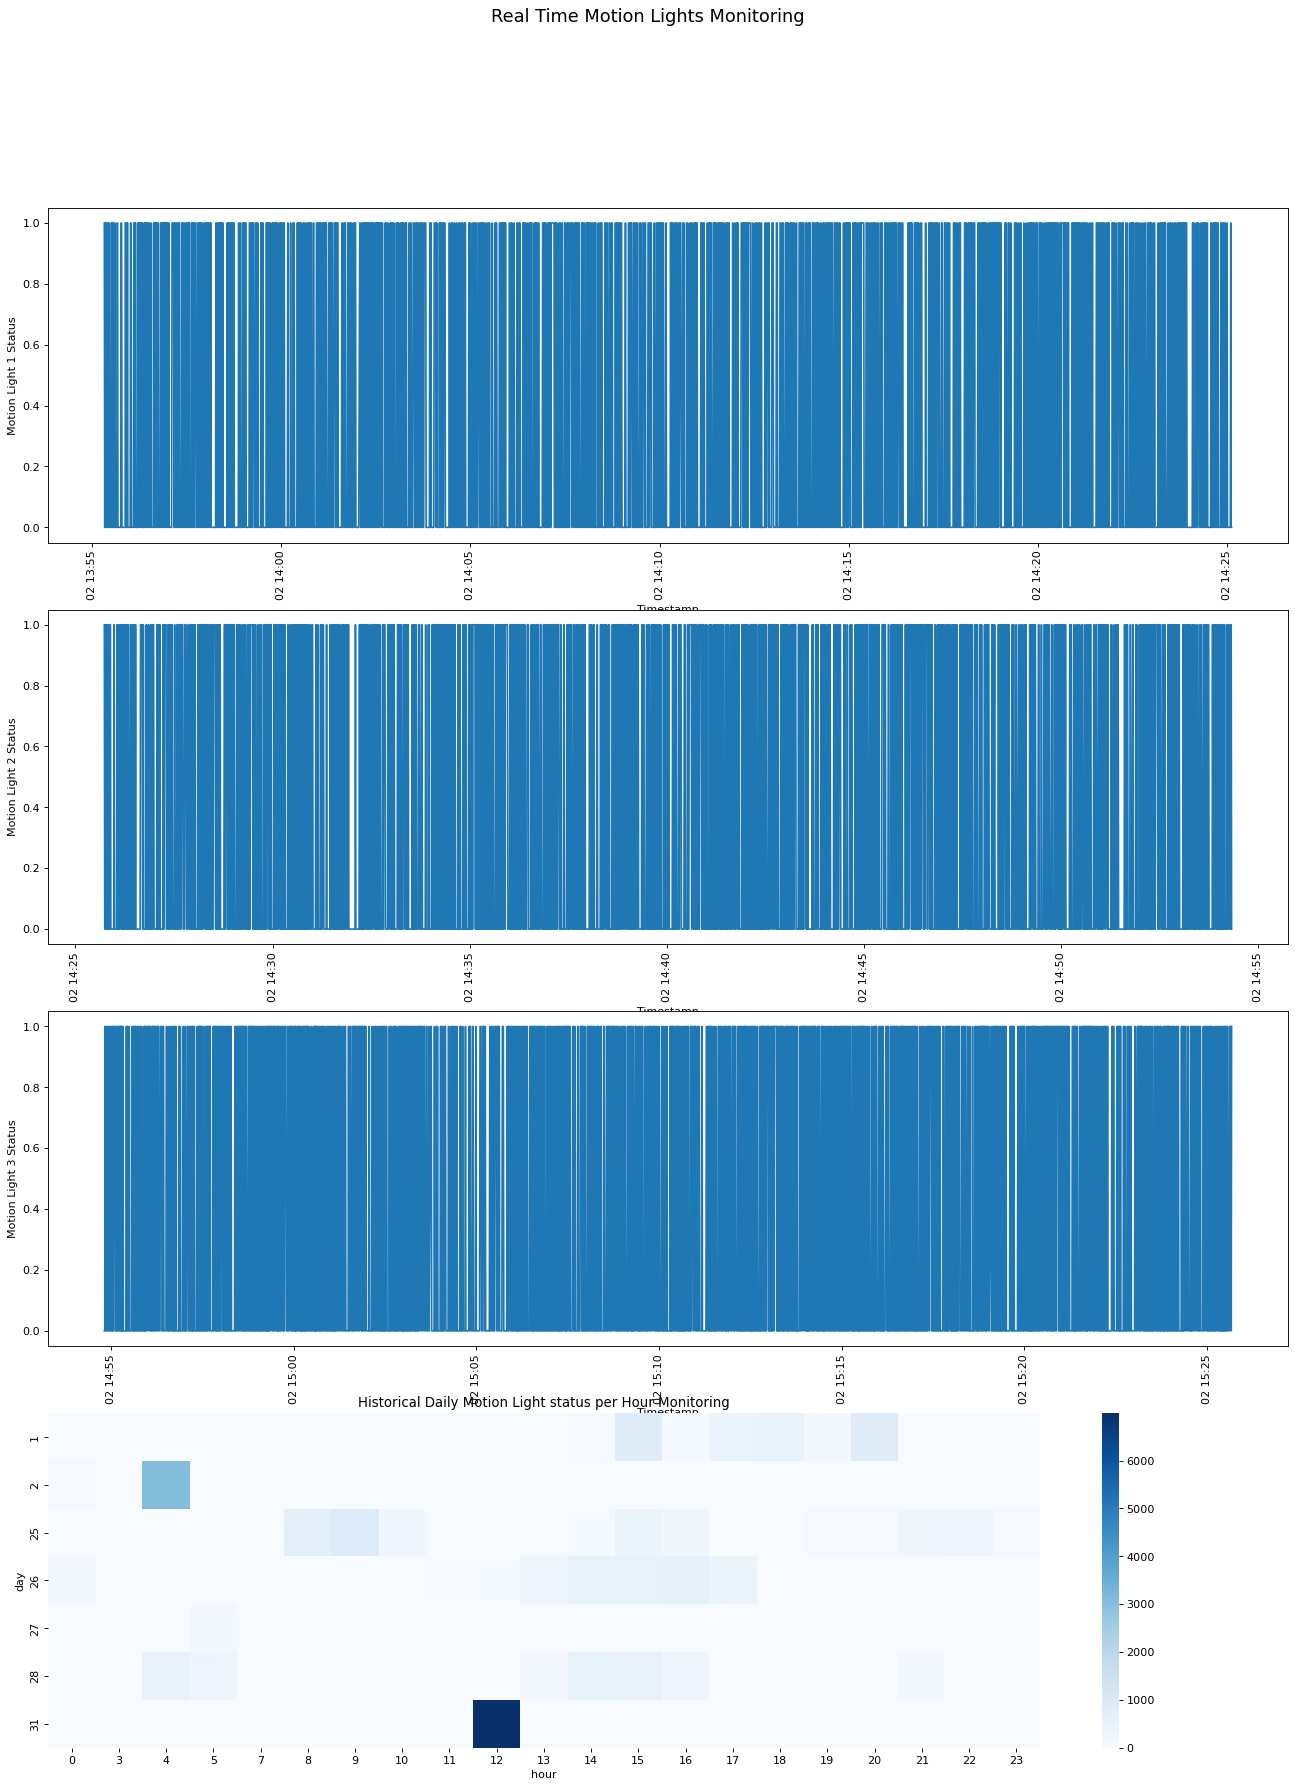

In [21]:
gs = gridspec.GridSpec(4, 1)

fig_motion_light_behavior = pl.figure(num=None, figsize=(20, 25), dpi=80, facecolor='w', edgecolor='k')
ax = pl.subplot(gs[0, 0]) # row 0, col 0
pl.plot(motion_light_1['date'], motion_light_1['encyclopedia/motion_light_1'])
pl.xticks(rotation=90)
pl.xlabel('Timestamp')
pl.ylabel('Motion Light 1 Status')

ax = pl.subplot(gs[1, 0]) # row 0, col 1
pl.plot(motion_light_2['date'], motion_light_2['encyclopedia/motion_light_2'])
pl.xticks(rotation=90)
pl.xlabel('Timestamp')
pl.ylabel('Motion Light 2 Status')

ax = pl.subplot(gs[2, 0]) # row 1, span all columns
pl.plot(motion_light_3['date'], motion_light_3['encyclopedia/motion_light_3'])
pl.xticks(rotation=90)
pl.xlabel('Timestamp')
pl.ylabel('Motion Light 3 Status')

ax = pl.subplot(gs[3,0])
ax.set_title('Historical Daily Motion Light status per Hour Monitoring')
seaborn.heatmap(motion_light_hist_pvt, ax=ax, cmap='Blues')

fig_motion_light_behavior.suptitle('Real Time Motion Lights Monitoring', fontsize=16)

In [22]:
html_str = mpld3.fig_to_html(fig_motion_light_behavior)
Html_file= open("app_web_motion_light_monitoring.html","w")
Html_file.write(html_str)
Html_file.close()

In [23]:
with open('last_signals.json', 'w') as fp:
    json.dump(last_checked_signals, fp)